In [66]:
# EDA on Cricket Analysis

In [67]:
# module needed 
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [68]:
# what we know about the dataset by the csv file and question file :


# Attributes included in the dataset:
# Year: The year of the IPL season, indicating 2008 to 2024 in this case.
# Player_Name: Names of the players showcasing their prowess on the cricket field.
# Matches_Batted: The number of matches in which the player batted.
# Not_Outs: Number of times the player remained not out while batting.
# Runs_Scored: Total runs scored by the player throughout the season.
# Highest_Score: Player's highest individual score in a single match.
# Batting_Average: The average runs scored per dismissal.
# Balls_Faced: Total number of balls faced by the player while batting.
# Batting_Strike_Rate:The rate at which the player scores runs per 100 balls faced.
# Centuries: Number of centuries scored by the player.
# Half_Centuries: Number of half-centuries scored by the player.
# Fours: Total number of boundaries (4 runs) hit by the player.
# Sixes: Total number of sixes (6 runs) hit by the player.
# Catches_Taken: Number of catches taken by the player in the field.
# Stumpings: Number of times the player effected a stumping as a wicketkeeper.
# Matches_Bowled: The number of matches in which the player bowled.
# Balls_Bowled: Total number of balls bowled by the player.
# Runs_Conceded: Total runs conceded by the player while bowling.
# Wickets_Taken: Number of wickets taken by the player.
# Best_Bowling_Match: Player's best bowling performance in a single match.
# Bowling_Average: The average runs conceded per wicket taken.
# Economy_Rate: The average number of runs conceded per over bowled.
# Bowling_Strike_Rate: The rate at which the player takes wickets per ball bowled.
# Four_Wicket_Hauls: Number of times the player took four wickets in an inning.
# Five_Wicket_Hauls: Number of times the player took five wickets or more in an inning

In [69]:
df = pd.read_csv(r"C:\Users\RISHIKA\rishika code\Downloads\cricket_data.csv")

1. Identify and handle any missing values in the dataset

In [70]:
# Step 1: Checking the missing values
print("Missing Values in Each Column:\n")
print(df.isnull().sum())

Missing Values in Each Column:

Year                   0
Player_Name            0
Matches_Batted         0
Not_Outs               0
Runs_Scored            0
Highest_Score          0
Batting_Average        0
Balls_Faced            0
Batting_Strike_Rate    0
Centuries              0
Half_Centuries         0
Fours                  0
Sixes                  0
Catches_Taken          0
Stumpings              0
Matches_Bowled         0
Balls_Bowled           0
Runs_Conceded          0
Wickets_Taken          0
Best_Bowling_Match     0
Bowling_Average        0
Economy_Rate           0
Bowling_Strike_Rate    0
Four_Wicket_Hauls      0
Five_Wicket_Hauls      0
dtype: int64


2. Are there any inconsistencies in the dataset (e.g., mismatched data types, outliers)?

In [123]:
# 2.Are there any inconsistencies in the dataset (e.g., mismatched data types, outliers)?
# Convert columns to numeric where ever possible.
for col in df.columns.difference(['Player_Name', 'Year', 'Best_Bowling_Match']):
    df[col] = df[col].replace('-', np.nan)
    df[col] = df[col].astype(str).str.replace('*', '', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')

df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Detect outliers using IQR method
def detect_outliers_iqr(data):
    outlier_indices = {}
    for col in data.select_dtypes(include=[np.number]).columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = data[(data[col] < lower) | (data[col] > upper)]
        if not outliers.empty:
            outlier_indices[col] = len(outliers)
    return outlier_indices

outliers_detected = detect_outliers_iqr(df)
print(" Outliers found in:\n", outliers_detected)

 Outliers found in:
 {'Year': 12, 'Not_Outs': 35, 'Runs_Scored': 26, 'Highest_Score': 1, 'Batting_Average': 10, 'Balls_Faced': 29, 'Batting_Strike_Rate': 9, 'Centuries': 37, 'Half_Centuries': 136, 'Fours': 61, 'Sixes': 53, 'Catches_Taken': 30, 'Stumpings': 74, 'Wickets_Taken': 32, 'Bowling_Average': 32, 'Economy_Rate': 1, 'Bowling_Strike_Rate': 18, 'Four_Wicket_Hauls': 78, 'Five_Wicket_Hauls': 20}


In [124]:
# Step 2.1: Check data types of all columns
print("\nData Types of Each Column:\n")
print(df.dtypes)


Data Types of Each Column:

Year                   float64
Player_Name             object
Matches_Batted         float64
Not_Outs               float64
Runs_Scored            float64
Highest_Score          float64
Batting_Average        float64
Balls_Faced            float64
Batting_Strike_Rate    float64
Centuries              float64
Half_Centuries         float64
Fours                  float64
Sixes                  float64
Catches_Taken          float64
Stumpings              float64
Matches_Bowled         float64
Balls_Bowled           float64
Runs_Conceded          float64
Wickets_Taken          float64
Best_Bowling_Match      object
Bowling_Average        float64
Economy_Rate           float64
Bowling_Strike_Rate    float64
Four_Wicket_Hauls      float64
Five_Wicket_Hauls      float64
dtype: object


In [125]:
# Step 2.2: View sample values of 'Highest_Score' to detect issues
print("\nUnique Values in 'Highest_Score' (Sample):")
print(df['Highest_Score'].unique()[:20])


Unique Values in 'Highest_Score' (Sample):
[ 46.  92.  99. 101.  72.  87.   0.  32.  50.  18.  47.  84.  79.  61.
  64.  53.  57.  67.  51.  70.]


In [126]:
# Step 2.3: Convert Highest_Score to numeric (remove '*')
df['Highest_Score'] = df['Highest_Score'].astype(str).str.replace("*", "", regex=False)
df['Highest_Score'] = pd.to_numeric(df['Highest_Score'], errors='coerce')

3. Convert all numerical columns to appropriate data types for analysis

In [127]:
# Step 2.4: Convert all other numeric columns (stored as object) to correct types
cols_to_convert = [
    'Matches_Batted', 'Not_Outs', 'Runs_Scored', 'Batting_Average', 'Balls_Faced',
    'Batting_Strike_Rate', 'Centuries', 'Half_Centuries', 'Fours', 'Sixes',
    'Catches_Taken', 'Stumpings', 'Matches_Bowled', 'Balls_Bowled', 'Runs_Conceded',
    'Wickets_Taken', 'Bowling_Average', 'Economy_Rate', 'Bowling_Strike_Rate',
    'Four_Wicket_Hauls', 'Five_Wicket_Hauls'
]

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Check again after conversion
print("\nData Types After Conversion:\n")
print(df[cols_to_convert].dtypes)




Data Types After Conversion:

Matches_Batted         float64
Not_Outs               float64
Runs_Scored            float64
Batting_Average        float64
Balls_Faced            float64
Batting_Strike_Rate    float64
Centuries              float64
Half_Centuries         float64
Fours                  float64
Sixes                  float64
Catches_Taken          float64
Stumpings              float64
Matches_Bowled         float64
Balls_Bowled           float64
Runs_Conceded          float64
Wickets_Taken          float64
Bowling_Average        float64
Economy_Rate           float64
Bowling_Strike_Rate    float64
Four_Wicket_Hauls      float64
Five_Wicket_Hauls      float64
dtype: object


In [128]:
# Step 2.5: Optional - Save cleaned file
# df.to_csv("cleaned_ipl2024_data.csv", index=False)



4.Normalize or standardize relevant numerical features for better comparison.

In [129]:
# Step 3: Normalize and Standardize selected numerical features
features_to_scale = [
    'Runs_Scored', 'Batting_Average', 'Balls_Faced', 'Batting_Strike_Rate',
    'Fours', 'Sixes', 'Catches_Taken', 'Stumpings',
    'Balls_Bowled', 'Runs_Conceded', 'Wickets_Taken', 'Bowling_Average',
    'Economy_Rate', 'Bowling_Strike_Rate'
]



In [130]:
# Drop rows with NaN in these features for scaling
df_scaled = df.dropna(subset=features_to_scale).copy()
print(df_scaled)

        Year      Player_Name  Matches_Batted  Not_Outs  Runs_Scored  \
0     2024.0  Ruturaj Gaikwad             2.0       0.0         61.0   
1     2023.0  Ruturaj Gaikwad            16.0       1.0        590.0   
2     2022.0  Ruturaj Gaikwad            14.0       0.0        368.0   
3     2021.0  Ruturaj Gaikwad            16.0       2.0        635.0   
4     2020.0  Ruturaj Gaikwad             6.0       2.0        204.0   
...      ...              ...             ...       ...          ...   
1166  2023.0  Mayank Markande            10.0       3.0         21.0   
1167  2022.0  Mayank Markande             2.0       0.0          0.0   
1168  2021.0  Mayank Markande             1.0       0.0          0.0   
1169  2019.0  Mayank Markande             3.0       1.0          6.0   
1170  2018.0  Mayank Markande            14.0       4.0         21.0   

      Highest_Score  Batting_Average  Balls_Faced  Batting_Strike_Rate  \
0              46.0            30.50         51.0            

In [131]:
# Normalize (0 to 1)
normalizer = MinMaxScaler()
df_normalized = pd.DataFrame(normalizer.fit_transform(df_scaled[features_to_scale]),
                             columns=[col + '_Norm' for col in features_to_scale])
print(df_normalized)


      Runs_Scored_Norm  Batting_Average_Norm  Balls_Faced_Norm  \
0             0.062693              0.301980          0.079688   
1             0.606372              0.417228          0.625000   
2             0.378212              0.260297          0.454688   
3             0.652621              0.449010          0.728125   
4             0.209661              0.504950          0.264063   
...                ...                   ...               ...   
1125          0.021583              0.000000          0.020313   
1126          0.000000              0.000000          0.000000   
1127          0.000000              0.000000          0.000000   
1128          0.006166              0.059406          0.007812   
1129          0.021583              0.103960          0.037500   

      Batting_Strike_Rate_Norm  Fours_Norm  Sixes_Norm  Catches_Taken_Norm  \
0                     0.299025    0.090909    0.019231            0.000000   
1                     0.368750    0.522727    0.576

In [132]:
# Standardize (mean = 0, std = 1)
standardizer = StandardScaler()
df_standardized = pd.DataFrame(standardizer.fit_transform(df_scaled[features_to_scale]),
                               columns=[col + '_Std' for col in features_to_scale])
print(df_standardized)


      Runs_Scored_Std  Batting_Average_Std  Balls_Faced_Std  \
0           -0.416720             0.790247        -0.388468   
1            2.677111             1.494721         2.457479   
2            1.378754             0.535451         1.568630   
3            2.940291             1.688995         2.995681   
4            0.419608             2.030943         0.573772   
...               ...                  ...              ...   
1125        -0.650658            -1.055667        -0.698342   
1126        -0.773476            -1.055667        -0.804352   
1127        -0.773476            -1.055667        -0.804352   
1128        -0.738385            -0.692536        -0.763579   
1129        -0.650658            -0.420188        -0.608642   

      Batting_Strike_Rate_Std  Fours_Std  Sixes_Std  Catches_Taken_Std  \
0                    0.292349  -0.222574  -0.572748          -0.992921   
1                    0.763793   2.094354   3.199908           4.115279   
2                    

In [133]:
# Combine with original df
df_scaled.reset_index(drop=True, inplace=True)
df_cleaned = pd.concat([df_scaled, df_normalized, df_standardized], axis=1)


In [134]:
# Optional: Save to file
# df_cleaned.to_csv("cleaned_normalized_ipl2024_data.csv", index=False)



5. How would you handle data if there are duplicate records?

In [135]:
# Step 4: Handle Duplicate Records

# Check for duplicate rows
duplicate_rows = df_cleaned.duplicated()
num_duplicates = duplicate_rows.sum()

print(f"\n Found {num_duplicates} duplicate rows.")

# Remove duplicates if any
df_cleaned = df_cleaned.drop_duplicates()

print(f"After removing duplicates, dataset has {len(df_cleaned)} rows.")

# Optional: Save to file
# df_cleaned.to_csv("cleaned_normalized_ipl2024_data.csv", index=False)



 Found 0 duplicate rows.
After removing duplicates, dataset has 1130 rows.


6. What is the distribution of the Batting Average for all players?

Text(0, 0.5, 'Count')

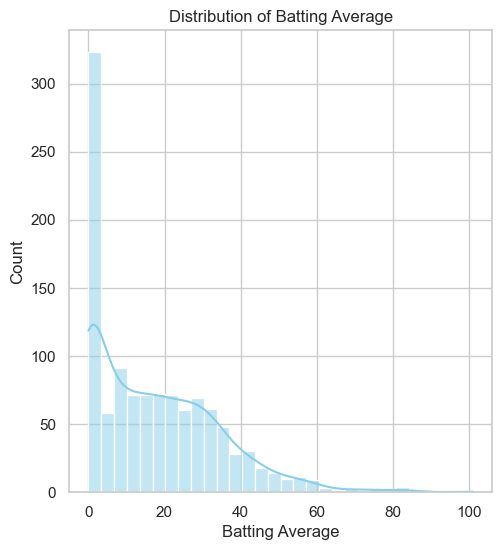

In [136]:
# Step 6 (EDA): Distribution of Batting Average

plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['Batting_Average'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Batting Average')
plt.xlabel('Batting Average')
plt.ylabel('Count')


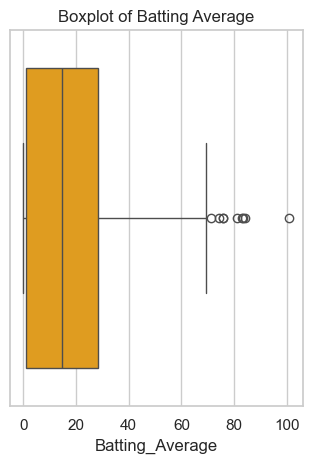

In [137]:
# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df_cleaned['Batting_Average'], color='orange')
plt.title('Boxplot of Batting Average')

plt.tight_layout()
plt.show()


7. Which player has the highest Batting Strike Rate across all seasons?

In [138]:

# Step 7 (EDA): Player with Highest Batting Strike Rate

max_strike_rate = df_cleaned['Batting_Strike_Rate'].max()
best_striker = df_cleaned[df_cleaned['Batting_Strike_Rate'] == max_strike_rate]

print("\nS Player with the Highest Batting Strike Rate")
print(best_striker[['Player_Name', 'Year', 'Batting_Strike_Rate', 'Runs_Scored']])

# Optional: Save to file
# df_cleaned.to_csv("cleaned_normalized_ipl2024_data.csv", index=False)



S Player with the Highest Batting Strike Rate
       Player_Name    Year  Batting_Strike_Rate  Runs_Scored
525  Prerak Mankad  2022.0                400.0          4.0


8. What is the trend in Runs Scored for each player over different years?

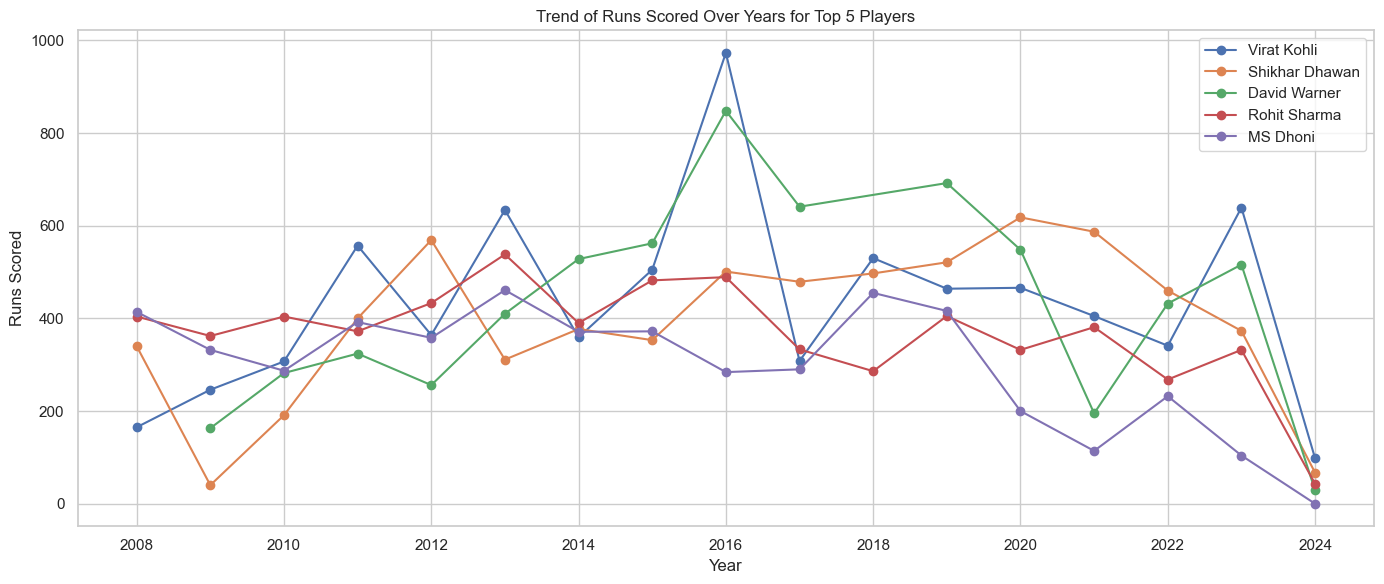

In [139]:
# Step 8 (EDA): Trend in Runs Scored over Years for Each Player

plt.figure(figsize=(14, 6))
top_players = df_cleaned.groupby('Player_Name')['Runs_Scored'].sum().nlargest(5).index

for player in top_players:
    player_data = df_cleaned[df_cleaned['Player_Name'] == player].sort_values('Year')
    plt.plot(player_data['Year'], player_data['Runs_Scored'], marker='o', label=player)

plt.title('Trend of Runs Scored Over Years for Top 5 Players')
plt.xlabel('Year')
plt.ylabel('Runs Scored')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Save to file
# df_cleaned.to_csv("cleaned_normalized_ipl2024_data.csv", index=False)



8. What is the trend in Runs Scored for each player over different years?

In [140]:
# Step 8 (EDA): Top 3 Players with Most Centuries

top_centurions = df_cleaned.groupby('Player_Name')['Centuries'].sum().nlargest(3).reset_index()

print("\n Top 3 Players with the Most Centuries")
print(top_centurions)

# Optional: Save to file
# df_cleaned.to_csv("cleaned_normalized_ipl2024_data.csv", index=False)



 Top 3 Players with the Most Centuries
    Player_Name  Centuries
0   Virat Kohli        7.0
1   Jos Buttler        5.0
2  David Warner        4.0


10. Which player has the highest Bowling Economy Rate?

In [141]:
# Step 10 (EDA): Player with Highest Bowling Economy Rate

max_economy = df_cleaned['Economy_Rate'].max()
worst_economy_player = df_cleaned[df_cleaned['Economy_Rate'] == max_economy]

print("\n Player with the Highest Bowling Economy Rate")
print(worst_economy_player[['Player_Name', 'Year', 'Economy_Rate', 'Wickets_Taken']])

# Optional: Save to file
# df_cleaned.to_csv("cleaned_normalized_ipl2024_data.csv", index=False)



 Player with the Highest Bowling Economy Rate
          Player_Name    Year  Economy_Rate  Wickets_Taken
801  Yashasvi Jaiswal  2022.0          36.0            0.0


11. Create a new feature called "Boundary Percentage", which calculates the 
percentage of runs scored from fours and sixes.

In [142]:
# Step 11 (Feature Engineering): Calculate Boundary Percentage

# Total boundary runs from 4s and 6s
df_cleaned['Boundary_Runs'] = (df_cleaned['Fours'] * 4) + (df_cleaned['Sixes'] * 6)

# Avoid division by zero
df_cleaned['Boundary_Percentage'] = df_cleaned.apply(
    lambda row: (row['Boundary_Runs'] / row['Runs_Scored']) * 100 if row['Runs_Scored'] > 0 else 0,
    axis=1
)

print("\n Sample Boundary Percentage")
print(df_cleaned[['Player_Name', 'Year', 'Runs_Scored', 'Fours', 'Sixes', 'Boundary_Percentage']].head())

# Optional: Save to file
# df_cleaned.to_csv("cleaned_normalized_ipl2024_data.csv", index=False)




 Sample Boundary Percentage
       Player_Name    Year  Runs_Scored  Fours  Sixes  Boundary_Percentage
0  Ruturaj Gaikwad  2024.0         61.0    8.0    1.0            62.295082
1  Ruturaj Gaikwad  2023.0        590.0   46.0   30.0            61.694915
2  Ruturaj Gaikwad  2022.0        368.0   33.0   14.0            58.695652
3  Ruturaj Gaikwad  2021.0        635.0   64.0   23.0            62.047244
4  Ruturaj Gaikwad  2020.0        204.0   16.0    6.0            49.019608


12. Create a feature called "Batting Impact Score" based on runs, strike rate, and 
average.


In [143]:

# Step 12 (Feature Engineering): Create Batting Impact Score

# Normalize runs, strike rate, and average to bring on same scale
from sklearn.preprocessing import MinMaxScaler

impact_features = df_cleaned[['Runs_Scored', 'Batting_Strike_Rate', 'Batting_Average']].fillna(0)
impact_scaler = MinMaxScaler()
impact_scaled = pd.DataFrame(impact_scaler.fit_transform(impact_features),
                              columns=['Runs_Scored_Norm', 'StrikeRate_Norm', 'Average_Norm'])

# Create weighted impact score
impact_scaled['Batting_Impact_Score'] = (
    0.4 * impact_scaled['Runs_Scored_Norm'] +
    0.3 * impact_scaled['StrikeRate_Norm'] +
    0.3 * impact_scaled['Average_Norm']
)

# Add it to df_cleaned
df_cleaned['Batting_Impact_Score'] = impact_scaled['Batting_Impact_Score']

print("\n Sample Batting Impact Score")
print(df_cleaned[['Player_Name', 'Year', 'Runs_Scored', 'Batting_Strike_Rate', 'Batting_Average', 'Batting_Impact_Score']].head())



 Sample Batting Impact Score
       Player_Name    Year  Runs_Scored  Batting_Strike_Rate  Batting_Average  \
0  Ruturaj Gaikwad  2024.0         61.0               119.61            30.50   
1  Ruturaj Gaikwad  2023.0        590.0               147.50            42.14   
2  Ruturaj Gaikwad  2022.0        368.0               126.46            26.29   
3  Ruturaj Gaikwad  2021.0        635.0               136.26            45.35   
4  Ruturaj Gaikwad  2020.0        204.0               120.71            51.00   

   Batting_Impact_Score  
0              0.205379  
1              0.478342  
2              0.324219  
3              0.497946  
4              0.325882  


13. Generate a metric to evaluate a player's all-round performance considering both 
batting and bowling stats.

In [144]:
# Step 13 (Feature Engineering): All-Rounder Performance Metric

# Normalize both batting and bowling aspects
allround_features = df_cleaned[['Batting_Impact_Score', 'Wickets_Taken', 'Bowling_Strike_Rate', 'Economy_Rate']].fillna(0)
allround_scaler = MinMaxScaler()
allround_scaled = pd.DataFrame(allround_scaler.fit_transform(allround_features),
                                columns=['Batting_Impact_Score_Norm', 'Wickets_Taken_Norm', 'Bowling_SR_Norm', 'Economy_Rate_Norm'])

# Since lower Bowling_SR and Economy_Rate are better, invert them (1 - value)
allround_scaled['Bowling_SR_Norm'] = 1 - allround_scaled['Bowling_SR_Norm']
allround_scaled['Economy_Rate_Norm'] = 1 - allround_scaled['Economy_Rate_Norm']

# Create a combined score
allround_scaled['AllRounder_Score'] = (
    0.4 * allround_scaled['Batting_Impact_Score_Norm'] +
    0.3 * allround_scaled['Wickets_Taken_Norm'] +
    0.15 * allround_scaled['Bowling_SR_Norm'] +
    0.15 * allround_scaled['Economy_Rate_Norm']
)

# Add it to df_cleaned
df_cleaned['AllRounder_Score'] = allround_scaled['AllRounder_Score']

print("\n: Sample All-Rounder Score")
print(df_cleaned[['Player_Name', 'Year', 'Batting_Impact_Score', 'Wickets_Taken', 'Bowling_Strike_Rate', 'Economy_Rate', 'AllRounder_Score']].head())



: Sample All-Rounder Score
       Player_Name    Year  Batting_Impact_Score  Wickets_Taken  \
0  Ruturaj Gaikwad  2024.0              0.205379            0.0   
1  Ruturaj Gaikwad  2023.0              0.478342            0.0   
2  Ruturaj Gaikwad  2022.0              0.324219            0.0   
3  Ruturaj Gaikwad  2021.0              0.497946            0.0   
4  Ruturaj Gaikwad  2020.0              0.325882            0.0   

   Bowling_Strike_Rate  Economy_Rate  AllRounder_Score  
0                  0.0           0.0          0.408831  
1                  0.0           0.0          0.553475  
2                  0.0           0.0          0.471805  
3                  0.0           0.0          0.563864  
4                  0.0           0.0          0.472686  


14. Categorize players into Aggressive, Balanced, and Defensive based on their strike 
rate.


In [145]:
# Step 14 (Feature Engineering): Categorize players as Aggressive, Balanced, or Defensive

def categorize_strike_rate(sr):
    if sr >= 140:
        return 'Aggressive'
    elif sr >= 120:
        return 'Balanced'
    else:
        return 'Defensive'

# Apply the function
df_cleaned['Batting_Style'] = df_cleaned['Batting_Strike_Rate'].apply(categorize_strike_rate)

print("\n Sample Batting Styles")
print(df_cleaned[['Player_Name', 'Year', 'Batting_Strike_Rate', 'Batting_Style']].head())


 Sample Batting Styles
       Player_Name    Year  Batting_Strike_Rate Batting_Style
0  Ruturaj Gaikwad  2024.0               119.61     Defensive
1  Ruturaj Gaikwad  2023.0               147.50    Aggressive
2  Ruturaj Gaikwad  2022.0               126.46      Balanced
3  Ruturaj Gaikwad  2021.0               136.26      Balanced
4  Ruturaj Gaikwad  2020.0               120.71      Balanced


15. Compute the year-over-year growth in performance metrics for each player.

In [146]:
# Step 15 (Feature Engineering): Year-over-Year Growth in Performance Metrics

# Define metrics to compute growth for
growth_metrics = ['Runs_Scored', 'Wickets_Taken', 'Batting_Impact_Score', 'AllRounder_Score']

# Sort values for proper calculation
df_cleaned = df_cleaned.sort_values(by=['Player_Name', 'Year'])

# Calculate YoY growth for each player
def compute_growth(df, column):
    return df.groupby('Player_Name')[column].pct_change().fillna(0)

for metric in growth_metrics:
    df_cleaned[f'{metric}_YoY_Growth'] = compute_growth(df_cleaned, metric)

print("\nSample Year-over-Year Growth")
print(df_cleaned[['Player_Name', 'Year'] + [f'{m}_YoY_Growth' for m in growth_metrics]].head(10))



Sample Year-over-Year Growth
          Player_Name    Year  Runs_Scored_YoY_Growth  \
1010      Abdul Samad  2020.0                0.000000   
1009      Abdul Samad  2021.0                0.000000   
1008      Abdul Samad  2022.0               -0.963964   
1007      Abdul Samad  2023.0               41.250000   
1006      Abdul Samad  2024.0               -0.911243   
262   Abhinav Manohar  2022.0                0.000000   
261   Abhinav Manohar  2023.0                0.055556   
1055  Abhishek Sharma  2018.0                0.000000   
1054  Abhishek Sharma  2019.0               -0.857143   
1053  Abhishek Sharma  2020.0                6.888889   

      Wickets_Taken_YoY_Growth  Batting_Impact_Score_YoY_Growth  \
1010                       0.0                         0.000000   
1009                       0.0                        -0.257474   
1008                      -1.0                        -0.716535   
1007                       0.0                         4.828577   
1006   

16. Create a bar chart to show the Runs Scored vs. Balls Faced for all players.

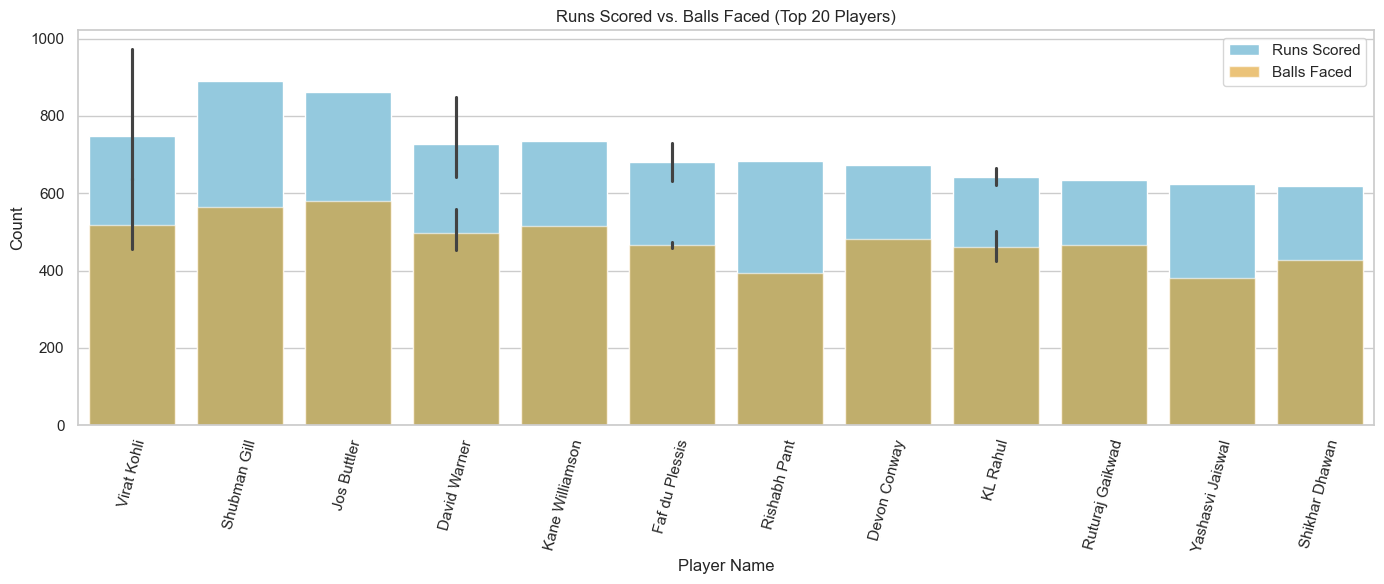


Bar chart of Runs Scored vs. Balls Faced shown above.


In [106]:
# Step 16 (Visualization): Runs Scored vs. Balls Faced Bar Chart

import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style='whitegrid')

# Plot only players with non-zero values
df_plot = df_cleaned[(df_cleaned['Runs_Scored'] > 0) & (df_cleaned['Balls_Faced'] > 0)].copy()

# Sort by Runs_Scored
df_plot = df_plot.sort_values(by='Runs_Scored', ascending=False).head(20)  # Top 20 for better visibility

plt.figure(figsize=(14, 6))
sns.barplot(x='Player_Name', y='Runs_Scored', data=df_plot, label='Runs Scored', color='skyblue')
sns.barplot(x='Player_Name', y='Balls_Faced', data=df_plot, label='Balls Faced', color='orange', alpha=0.6)

plt.xticks(rotation=75)
plt.title('Runs Scored vs. Balls Faced (Top 20 Players)')
plt.xlabel('Player Name')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()

print("\nBar chart of Runs Scored vs. Balls Faced shown above.")


17. Generate a heatmap showing the correlation between different numerical features

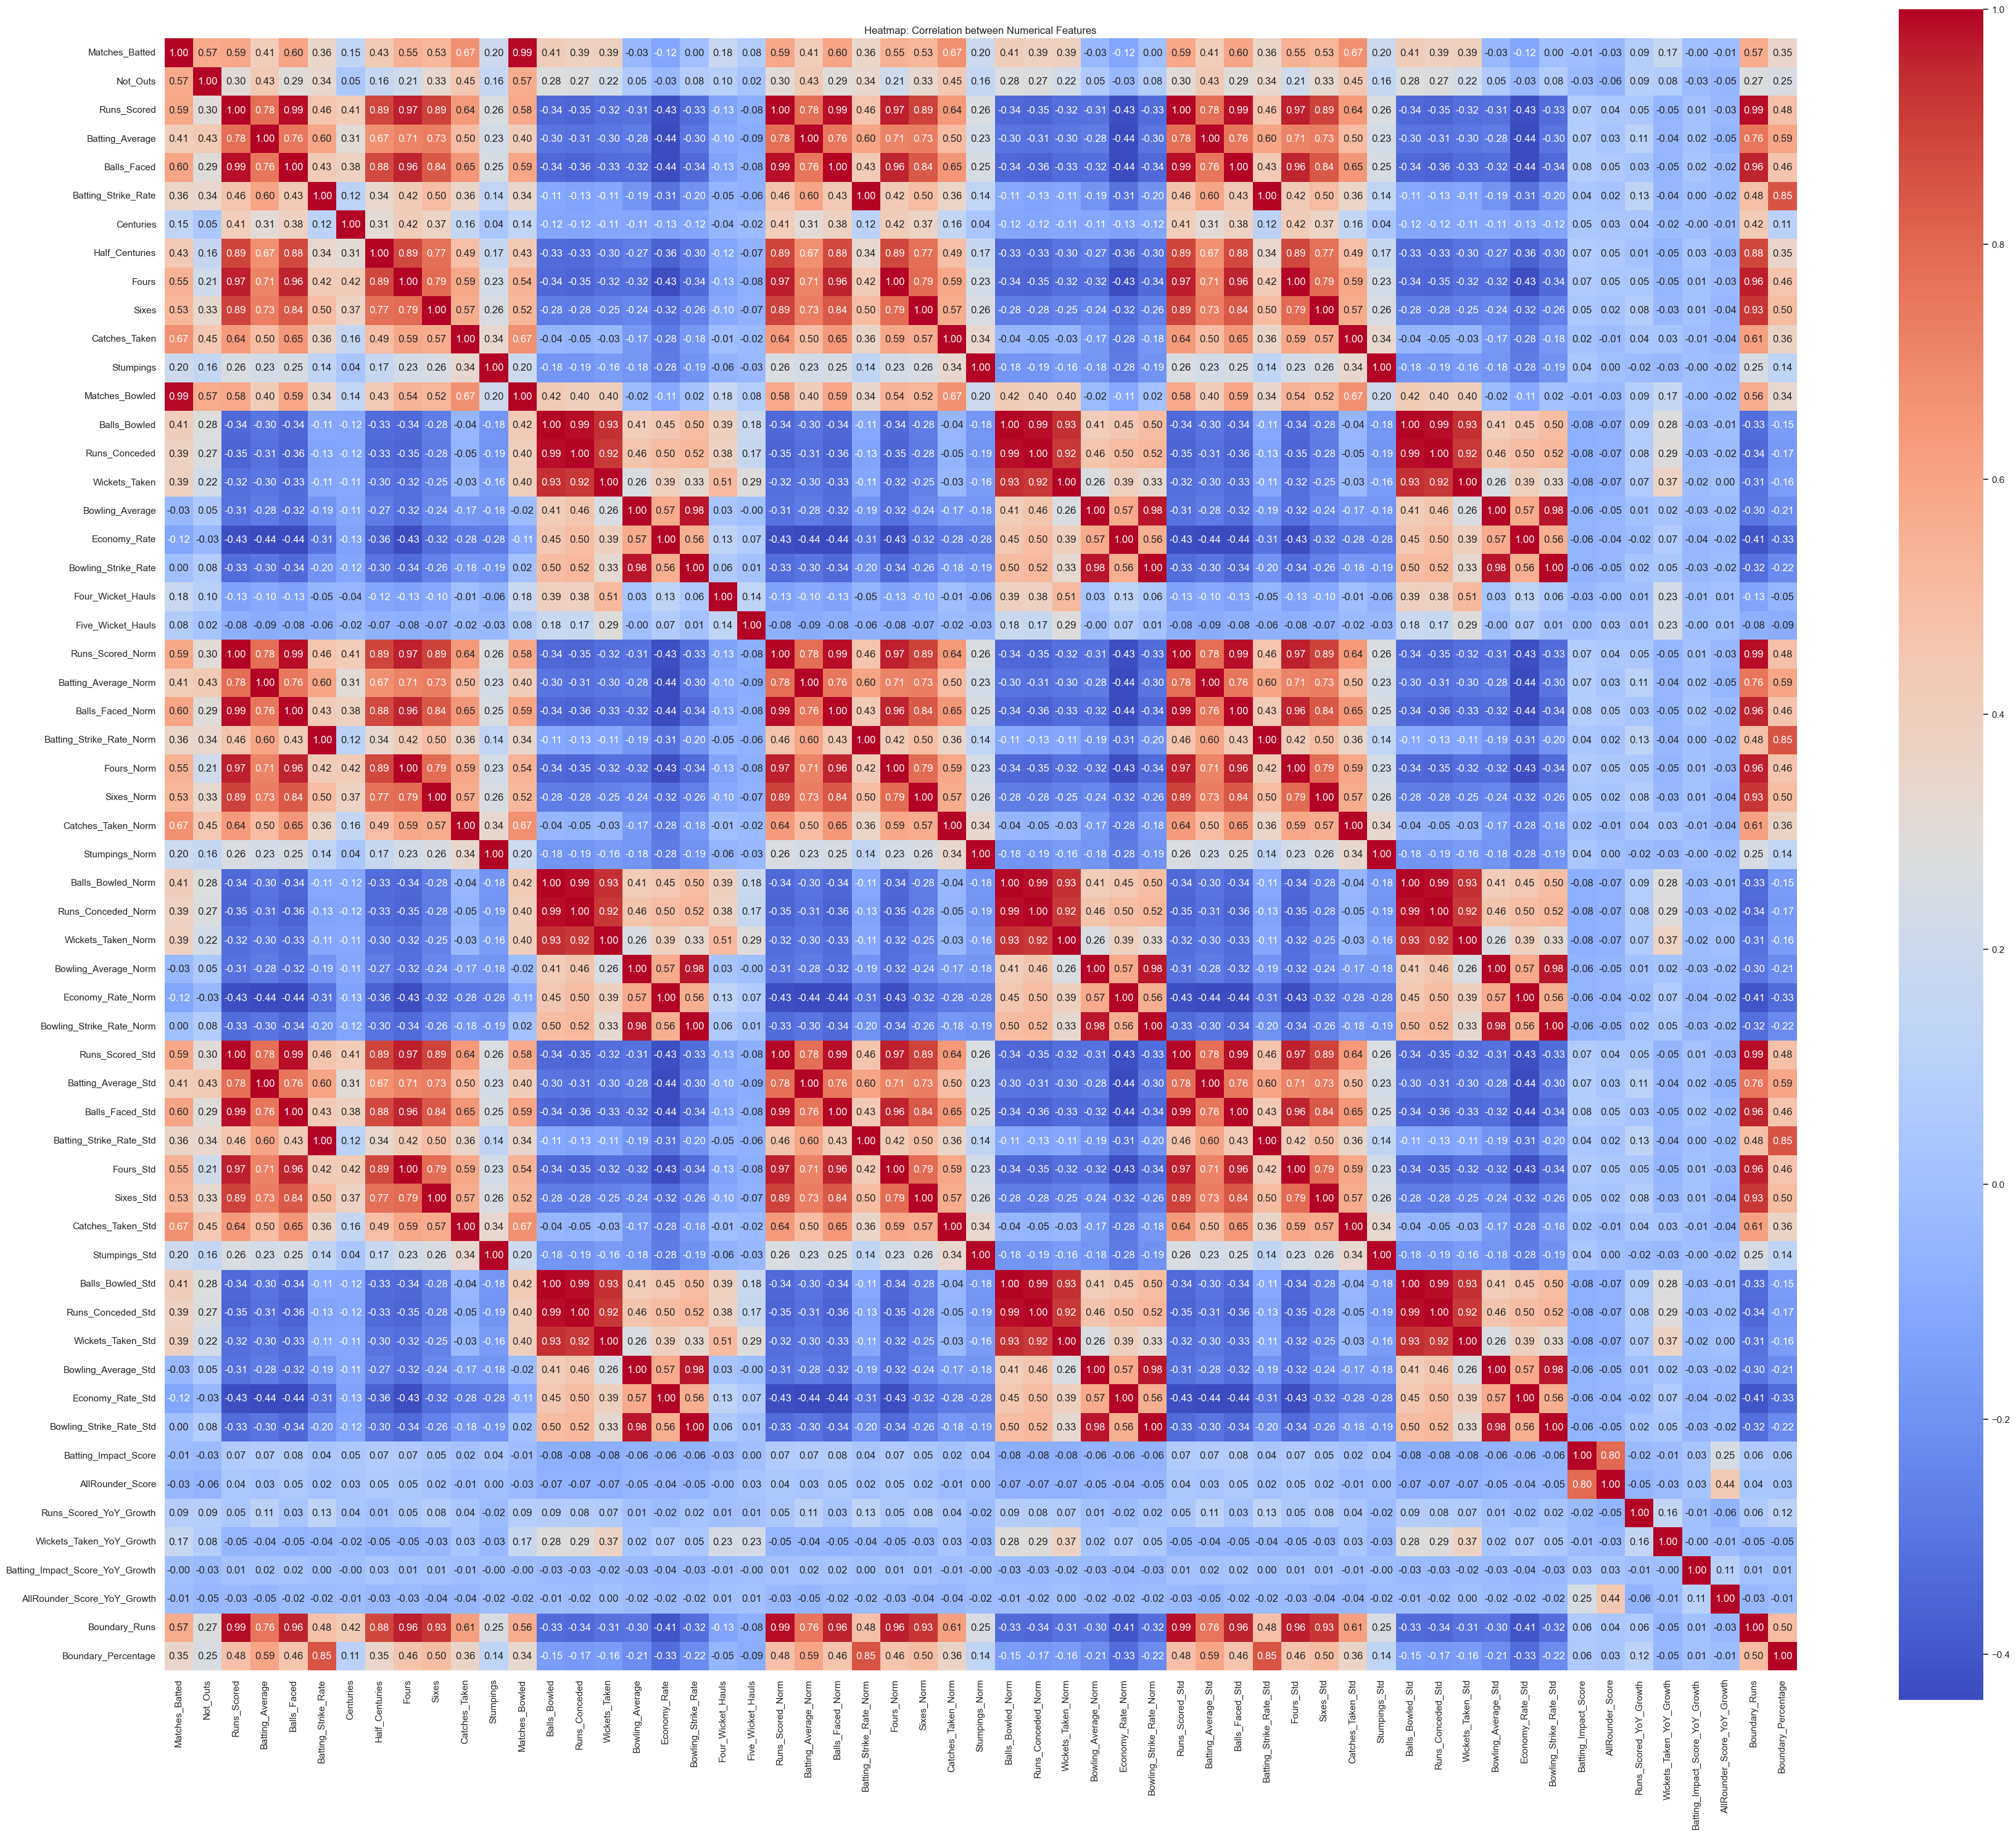


 Correlation heatmap displayed above.


In [107]:
# Select only numerical columns
numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(36, 30))
correlation_matrix = df_cleaned[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Heatmap: Correlation between Numerical Features')
plt.tight_layout()
plt.show()

print("\n Correlation heatmap displayed above.")


18. Plot a trend line showing the performance of a single player over multiple years.

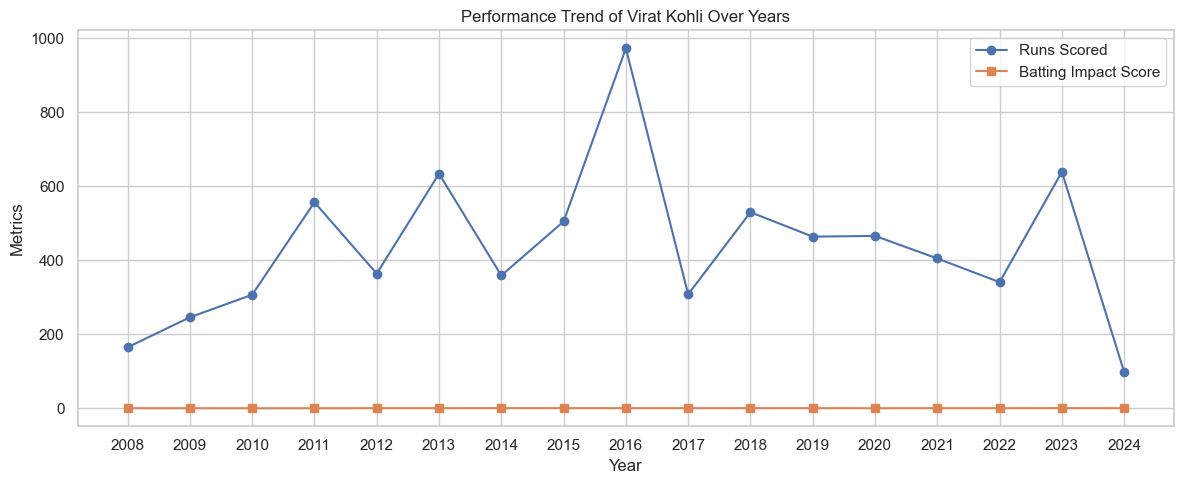


 Trend line of Virat Kohli's Runs and Batting Impact Score shown above.


In [108]:
# Step 18(Visualization): Trend Line for a Single Player

# Choose a player (you can modify the name)
selected_player = 'Virat Kohli'

# Filter and sort data
player_trend = df_cleaned[df_cleaned['Player_Name'] == selected_player].sort_values('Year')

plt.figure(figsize=(12, 5))
plt.plot(player_trend['Year'], player_trend['Runs_Scored'], marker='o', label='Runs Scored')
plt.plot(player_trend['Year'], player_trend['Batting_Impact_Score'], marker='s', label='Batting Impact Score')

plt.title(f'Performance Trend of {selected_player} Over Years')
plt.xlabel('Year')
plt.ylabel('Metrics')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"\n Trend line of {selected_player}'s Runs and Batting Impact Score shown above.")


19. Create a pie chart for the distribution of centuries and half-centuries across all 
players.

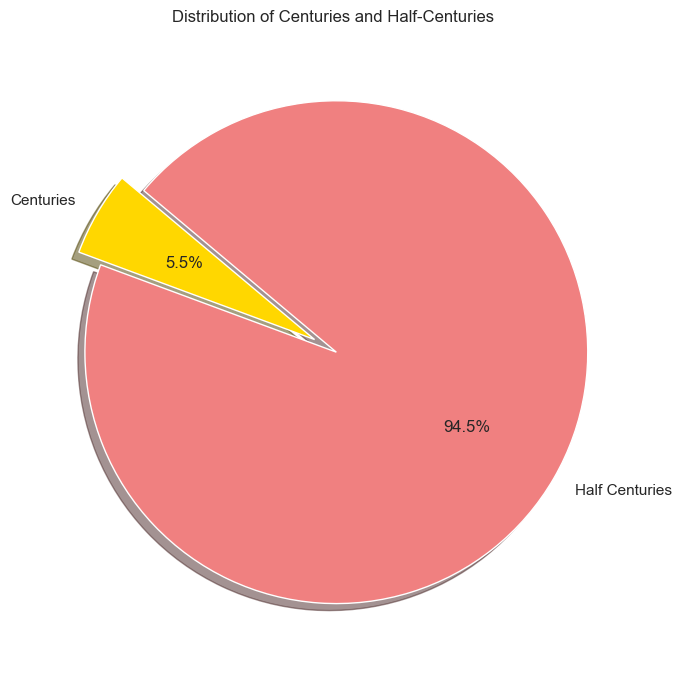

In [110]:
# Step 19 (Visualization): Pie Chart of Centuries vs. Half-Centuries

total_centuries = df_cleaned['Centuries'].sum()
total_half_centuries = df_cleaned['Half_Centuries'].sum()

labels = ['Centuries', 'Half Centuries']
sizes = [total_centuries, total_half_centuries]
colors = ['gold', 'lightcoral']
explode = (0.1, 0)  # explode the first slice

plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Centuries and Half-Centuries')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


20. Develop a visualization to compare Bowling Average vs. Bowling Strike Rate.


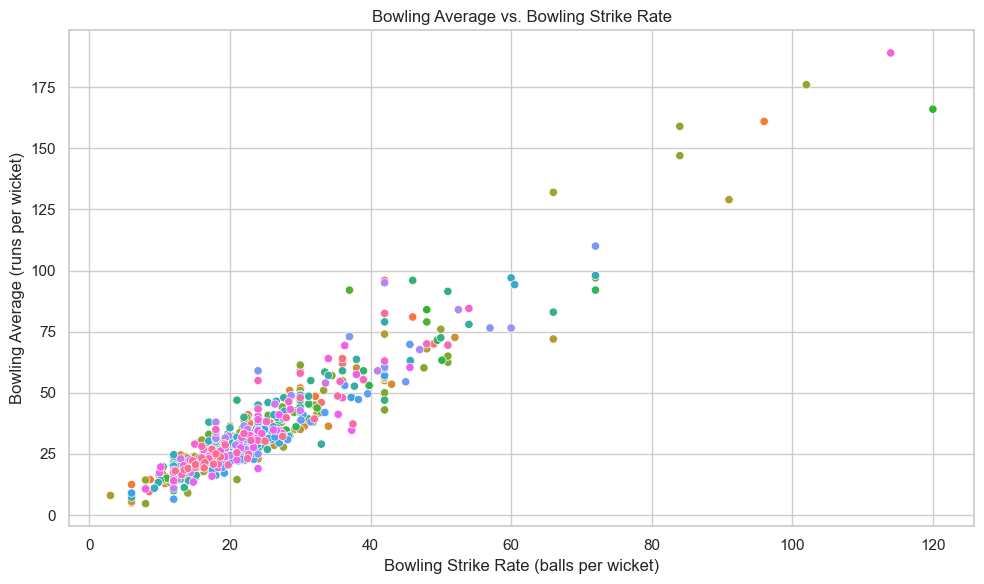

In [111]:
# Step 20 (Visualization): Bowling Average vs. Bowling Strike Rate Scatter Plot

# Filter for bowlers with valid values
bowling_df = df_cleaned[(df_cleaned['Bowling_Average'] > 0) & (df_cleaned['Bowling_Strike_Rate'] > 0)]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=bowling_df, x='Bowling_Strike_Rate', y='Bowling_Average', hue='Player_Name', legend=False)

plt.title('Bowling Average vs. Bowling Strike Rate')
plt.xlabel('Bowling Strike Rate (balls per wicket)')
plt.ylabel('Bowling Average (runs per wicket)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [33]:
# #  (Optional Export): Save Cleaned Dataset to CSV

# output_path = 'cleaned_ipl_2024_dataset.csv'
# df_cleaned.to_csv(output_path, index=False)

21. Write a Python query to get the top 5 players with the highest Batting Average.

In [116]:
# Step 21 (SQL-Style Query in Python): Top 5 Players with Highest Batting Average

# Remove NaN and sort by Batting Average
batting_avg_df = df_cleaned.dropna(subset=['Batting_Average'])
top5_batting_avg = batting_avg_df.sort_values(by='Batting_Average', ascending=False).head(5)

print("\n Top 5 Players with Highest Batting Average")
print(top5_batting_avg[['Player_Name', 'Year', 'Batting_Average']])



 Top 5 Players with Highest Batting Average
        Player_Name  Year  Batting_Average
493    Deepak Hooda  2020           101.00
392   Manish Pandey  2009            84.00
12         MS Dhoni  2019            83.20
1001     Tom Curran  2020            83.00
910     Virat Kohli  2016            81.08


22. Write a Python query to find out which player has played the most matches.

In [117]:
# Step 22: Player Who Played the Most Matches (Batted or Bowled)

df_cleaned['Matches_Played'] = df_cleaned[['Matches_Batted', 'Matches_Bowled']].fillna(0).sum(axis=1)

most_matches = df_cleaned.groupby('Player_Name')['Matches_Played'].sum().reset_index()
most_matches = most_matches.sort_values(by='Matches_Played', ascending=False).head(1)

print("\n Player Who Played the Most Matches (Batted or Bowled)")
print(most_matches)



 Player Who Played the Most Matches (Batted or Bowled)
   Player_Name  Matches_Played
82    MS Dhoni           504.0


23. Retrieve all players who have scored more than 500 runs in a season.

In [118]:
# Step 23: Players Who Scored More Than 500 Runs in a Season

high_scorers = df_cleaned[df_cleaned['Runs_Scored'] > 500].sort_values(by='Runs_Scored', ascending=False)

print("\n Players Who Scored More Than 500 Runs in a Season")
print(high_scorers[['Player_Name', 'Year', 'Runs_Scored']])



 Players Who Scored More Than 500 Runs in a Season
          Player_Name  Year  Runs_Scored
910       Virat Kohli  2016        973.0
214      Shubman Gill  2023        890.0
786       Jos Buttler  2022        863.0
127      David Warner  2016        848.0
257   Kane Williamson  2018        735.0
888    Faf du Plessis  2023        730.0
125      David Warner  2019        692.0
117      Rishabh Pant  2018        684.0
5        Devon Conway  2023        672.0
456          KL Rahul  2020        670.0
458          KL Rahul  2018        659.0
126      David Warner  2017        641.0
903       Virat Kohli  2023        639.0
3     Ruturaj Gaikwad  2021        635.0
913       Virat Kohli  2013        634.0
890    Faf du Plessis  2021        633.0
455          KL Rahul  2021        626.0
800  Yashasvi Jaiswal  2023        625.0
674    Shikhar Dhawan  2020        618.0
454          KL Rahul  2022        616.0
580  Suryakumar Yadav  2023        605.0
457          KL Rahul  2019        593.0
1    

24. Identify players who have taken at least one five-wicket haul.


In [119]:
# Step 24: Players Who Took At Least One Five-Wicket Haul

five_hauls = df_cleaned[df_cleaned['Five_Wicket_Hauls'] >= 1]

print("\n Players with At Least One Five-Wicket Haul")
print(five_hauls[['Player_Name', 'Year', 'Five_Wicket_Hauls']])



 Players with At Least One Five-Wicket Haul
              Player_Name  Year  Five_Wicket_Hauls
884            Adam Zampa  2016                1.0
660         Akash Madhwal  2023                1.0
982        Alzarri Joseph  2019                1.0
556           Amit Mishra  2008                1.0
402         Andre Russell  2021                1.0
740        Arshdeep Singh  2021                1.0
1092    Bhuvneshwar Kumar  2017                1.0
1086    Bhuvneshwar Kumar  2023                1.0
763         Harshal Patel  2021                1.0
199         Ishant Sharma  2011                1.0
632        Jasprit Bumrah  2022                1.0
1111       Jaydev Unadkat  2013                1.0
1107       Jaydev Unadkat  2017                1.0
338          Mohit Sharma  2023                1.0
53        Ravindra Jadeja  2012                1.0
437          Sunil Narine  2012                1.0
1122          Umran Malik  2022                1.0
444   Varun Chakaravarthy  2020      

25. Write a query to calculate the total number of boundaries hit by each player.

In [122]:
# Step 25: Total Number of Boundaries Hit by Each Player

df_cleaned['Total_Boundaries'] = df_cleaned[['Fours', 'Sixes']].fillna(0).sum(axis=1)
total_boundaries = df_cleaned.groupby('Player_Name')['Total_Boundaries'].sum().reset_index()
total_boundaries = total_boundaries.sort_values(by='Total_Boundaries', ascending=False)

print("\n Total Boundaries (Fours + Sixes) Hit by Each Player")
print(total_boundaries.head(10))


 Total Boundaries (Fours + Sixes) Hit by Each Player
        Player_Name  Total_Boundaries
165  Shikhar Dhawan             908.0
194     Virat Kohli             891.0
33     David Warner             877.0
148    Rohit Sharma             819.0
82         MS Dhoni             588.0
41   Dinesh Karthik             588.0
6    Ajinkya Rahane             553.0
66         KL Rahul             529.0
43   Faf du Plessis             527.0
156    Sanju Samson             495.0
